## Step # 1: Reading the data

In [1]:
# Import required packages
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# Read the data from 'train.csv' file
titanic = pd.read_csv('train.csv')

In [3]:
# View sample of data
titanic.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Step # 2: Cleaning the data

#### (1) Create a bar chart showing how many missing values are in each column

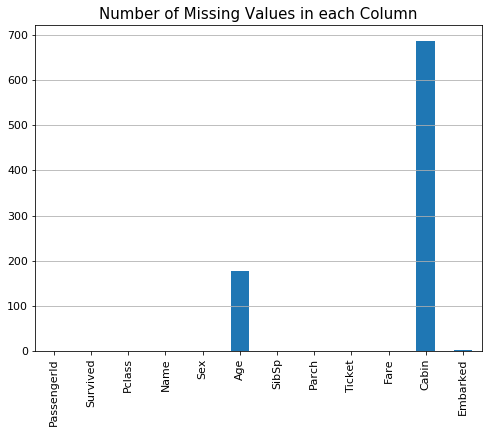

In [4]:
# Visualize the number of missing values in bar chart
fig, ax2 = plt.subplots()
titanic.isnull().sum().plot(kind='bar',ax=ax2, fontsize=11, figsize=(8,6));
ax2.grid(axis='y')
plt.title('Number of Missing Values in each Column', color = 'black',fontsize = 15);
plt.show()

#### (2) Which column has the most `NaN` values? How many cells in that column are empty?

In [8]:
# Print the number of missing
print(titanic.isnull().sum())
# Cabin has the most NaN values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


#### (3) Delete all rows where `Embarked` is empty

In [9]:
# Check the rows where Embarked == NaN
titanic[titanic.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [10]:
# Drop the rows where Emparked == NaN
titanic.dropna(subset=['Embarked'], inplace=True)

In [11]:
# Recheck the rows where Embarked == NaN
titanic.Embarked.isnull().sum()

0

#### (4) Fill all empty cabins with the symbol: **¯\\_(ツ)_/¯**

In [12]:
# Fill in all empty cabins with the symbol **¯\\_(ツ)_/¯**
titanic.Cabin.fillna('**¯\\_(ツ)_/¯**', inplace=True)

In [13]:
# View sample of data
titanic.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,**¯\_(ツ)_/¯**,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,**¯\_(ツ)_/¯**,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,**¯\_(ツ)_/¯**,S


## Step 3: Feature extraction

#### (1) There are two columns that pertain to how many family members are on the boat for a given person. Create a new column called `FamilyCount` which will be the sum of those two columns.

In [14]:
# Check SibSp & Parch columns type
print(titanic.SibSp.dtypes)
print(titanic.Parch.dtypes)

int64
int64


In [15]:
# Create FamilyCount column and view sample of the data with the new column
titanic['FamilyCount'] = titanic['SibSp'] + titanic['Parch']
titanic.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,**¯\_(ツ)_/¯**,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,**¯\_(ツ)_/¯**,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,**¯\_(ツ)_/¯**,S,0


#### (2) Reverends have a special title in their name. Create a column called `IsReverend`: 1 if they're a preacher, 0 if they're not.

In [16]:
# Check the number of preachers in the data
titanic['Name'].str.contains('Rev.').sum()

6

In [17]:
# Create a new column named 'IsReverend' and set its value to 1 if the person is a reverend, 
# otherwise 0
titanic['IsReverend'] = titanic['Name'].map(lambda name: 1 if "Rev." in name else 0)

In [18]:
# Check the value of 'IsReverend' for all reverends 
titanic[titanic['Name'].str.contains('Rev.')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,IsReverend
149,150,0,2,"Byles, Rev. Thomas Roussel Davids",male,42.0,0,0,244310,13.000,**¯\_(ツ)_/¯**,S,0,1
150,151,0,2,"Bateman, Rev. Robert James",male,51.0,0,0,S.O.P. 1166,12.525,**¯\_(ツ)_/¯**,S,0,1
249,250,0,2,"Carter, Rev. Ernest Courtenay",male,54.0,1,0,244252,26.000,**¯\_(ツ)_/¯**,S,1,1
626,627,0,2,"Kirkland, Rev. Charles Leonard",male,57.0,0,0,219533,12.350,**¯\_(ツ)_/¯**,Q,0,1
848,849,0,2,"Harper, Rev. John",male,28.0,0,1,248727,33.000,**¯\_(ツ)_/¯**,S,1,1
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.000,**¯\_(ツ)_/¯**,S,0,1


#### (3) In order to feed our training data into a classification algorithm, we need to convert our categories into 1's and 0's using `pd.get_dummies`
  - Create 3 columns: `Embarked_C`, `Embarked_Q` and `Embarked_S`. These columns will have 1's and 0's that correspond to the `C`, `Q` and `S` values in the `Embarked` column
  - Do the same thing for `Sex`
  - **BONUS**: Extract the title from everyone's name and create dummy columns

In [19]:
# Create three dummy columns from "Embared" column, and two dummy columns from 'Sex' column
titanic = pd.concat([titanic, pd.get_dummies(titanic["Embarked"], prefix = 'Embarked_')], axis = 1)
titanic = pd.concat([titanic, pd.get_dummies(titanic["Sex"], prefix = 'Sex_')], axis = 1)

In [20]:
# View sample of data
titanic.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,IsReverend,Embarked__C,Embarked__Q,Embarked__S,Sex__female,Sex__male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,**¯\_(ツ)_/¯**,S,1,0,0,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,1,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,**¯\_(ツ)_/¯**,S,0,0,0,0,1,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,0,0,1,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,**¯\_(ツ)_/¯**,S,0,0,0,0,1,0,1


In [22]:
# BONUS: check the value counts for each title
titanic['Name'].str.extract(r'(\w+\.)')[0].value_counts()

Mr.          517
Miss.        181
Mrs.         124
Master.       40
Dr.            7
Rev.           6
Col.           2
Mlle.          2
Major.         2
Jonkheer.      1
Don.           1
Ms.            1
Countess.      1
Mme.           1
Sir.           1
Capt.          1
Lady.          1
Name: 0, dtype: int64

In [23]:
# Using regulare expression, extract all the titles from 'Name' column and create a dummy column for each one
# the result is a new dataframe named 'titles'
titles = titanic['Name'].str.extract(r'(\w+\.)')[0].str.get_dummies()

In [24]:
# Concatenate 'titles' dataframe with our dataframe 'titanic' side by side, 
# and show sample of the data
titanic = pd.concat([titanic, titles], axis=1)
titanic.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Major.,Master.,Miss.,Mlle.,Mme.,Mr.,Mrs.,Ms.,Rev.,Sir.
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,0,0,0,0,0,1,0,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,0,0,0,0,0,0,1,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,0,0,1,0,0,0,0,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,0,0,0,0,0,0,1,0,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,0,0,0,0,0,1,0,0,0,0


## Step 4: Exploratory analysis

#### (1) What was the survival rate overall?

In [26]:
# Percentage of overall survival rate
nrows = len(titanic)
((titanic.Survived == 1).sum()/nrows)*100
# Overal survival rate is 38.245

38.24521934758155

#### (2) Which gender fared the worst? What was their survival rate?

In [27]:
# Survival rate of female passengers
(((titanic.Sex__female == 1) & (titanic.Survived == 1)).sum()/nrows)*100
# Female survival rate is 25.984

25.984251968503933

In [28]:
# Survival rate of male passengers
(((titanic.Sex__male == 1) & (titanic.Survived == 1)).sum()/nrows)*100
# Male survival rate is 12.261

12.260967379077616

#### (3) What was the survival rate for each `Pclass`?

In [29]:
# Survival rate for each class
titanic.groupby('Pclass').Survived.mean()*100
# Pclass 1:62.617; Pclass 2: 47.283; Pclass 3: 24.236

Pclass
1    62.616822
2    47.282609
3    24.236253
Name: Survived, dtype: float64

#### (4) Did any reverends survive? If so, how many?

In [30]:
# Check whether any reverends survived
((titanic['Rev.'] == 1) & (titanic.Survived == 1)).sum()
# No reverends survived

0

#### (5) What is the survival rate for cabins marked **¯\\_(ツ)_/¯**

In [31]:
# Number of cabins marked '**¯\\_(ツ)_/¯**'
mcabins = (titanic.Cabin == '**¯\\_(ツ)_/¯**').sum()

In [32]:
# Survival rate for cabins marked **¯\\_(ツ)_/¯**
(((titanic.Cabin == '**¯\\_(ツ)_/¯**') & (titanic.Survived == 1)).sum()/mcabins)*100
# cabins marked **¯\\_(ツ)_/¯** survival rate is 29.985

29.985443959243085

#### (6) What is the survival rate for people whose `Age` is empty?

In [33]:
# Number of passengers with null age value
nage = (titanic.Age.isnull()).sum()

In [34]:
# Survival rate for passengers with null age value
(((titanic.Age.isnull()) & (titanic.Survived == 1)).sum()/nage)*100
# people whose Age is empty survival rate is 29.379

29.37853107344633

#### (7) What is the survival rate for each port of embarkation?

In [35]:
# Survival rate for each port of embarkation
titanic.groupby('Embarked').Survived.mean()*100
# Cherbourg port: 55.357; Queenstown port: 38.961; Southampton port: 33.696

Embarked
C    55.357143
Q    38.961039
S    33.695652
Name: Survived, dtype: float64

#### (8) What is the survival rate for children (under 12) in each `Pclass`?

In [36]:
# Survival rate for children under the age of 12 in each Pclass
titanic[(titanic.Age < 12)].groupby('Pclass').Survived.mean()*100
# Upper class children: 75; Middle class children: 100; Lower class children: 40.426

Pclass
1     75.000000
2    100.000000
3     40.425532
Name: Survived, dtype: float64

#### (9) Did the captain of the ship survive? Is he on the list?

In [37]:
# Check whether the captain survived
((titanic['Capt.'] == 1) & (titanic.Survived == 1)).sum()
# No he didn't

0

#### (10) Of all the people that died, who had the most expensive ticket? How much did it cost?

In [38]:
# Show passenger(s) with most expensive ticket
titanic.loc[titanic['Fare'] == titanic[(titanic.Survived == 0)].Fare.max()]
# The most expensive ticket is 263.0

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Major.,Master.,Miss.,Mlle.,Mme.,Mr.,Mrs.,Ms.,Rev.,Sir.
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0,...,0,0,0,0,0,1,0,0,0,0
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0,...,0,0,1,0,0,0,0,0,0,0
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0,...,0,0,1,0,0,0,0,0,0,0
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0,...,0,0,0,0,0,1,0,0,0,0


#### (11) Does having family on the boat help or hurt your chances of survival?

In [39]:
# Number of families; 354
nfamily = (titanic.FamilyCount > 0).sum()

354

In [40]:
# Percentage of survived family; 50.565
(((titanic.FamilyCount > 0) & (titanic.Survived == 1)).sum()/nfamily)*100

50.56497175141242

In [41]:
# Percentage of died family; 49.435
(((titanic.FamilyCount > 0) & (titanic.Survived == 0)).sum()/nfamily)*100

49.43502824858757

## Additional Elements: Statistics in Python

#### Output the `.mean()`, `.median()`, `.skew()` and `.kurt()` of any continuous variable in the Titanic dataset.

In [42]:
# Output different statistics related to passengers age
titanic['Age'].agg(['min', 'max','mean', 'median', 'skew', 'kurt', 'std'])

min        0.420000
max       80.000000
mean      29.642093
median    28.000000
skew       0.388881
kurt       0.187949
std       14.492933
Name: Age, dtype: float64

In [43]:
# Output different statistics related to passengers ticket fare
titanic['Fare'].agg(['min', 'max','mean', 'median', 'skew', 'kurt', 'std'])

min         0.000000
max       512.329200
mean       32.096681
median     14.454200
skew        4.801440
kurt       33.508477
std        49.697504
Name: Fare, dtype: float64

## Step 5: Plotting

#### Using Matplotlib and Seaborn, create several charts showing the survival rates of different groups of people. It's fine if a handful of charts are basic (Gender, Age, etc), but what we're really looking for is something beneath the surface.

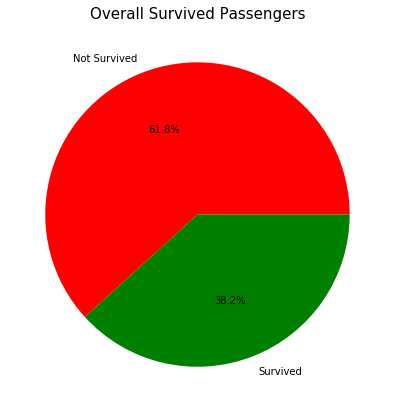

In [44]:
# Overal survived passengers data
labels = ['Not Survived', 'Survived']
colors = ['red','green']
explode = [0,0]
sizes = titanic.Survived.value_counts().values

# Visual
plt.figure(figsize = (7,7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%');
plt.title('Overall Survived Passengers',color = 'black',fontsize = 15);

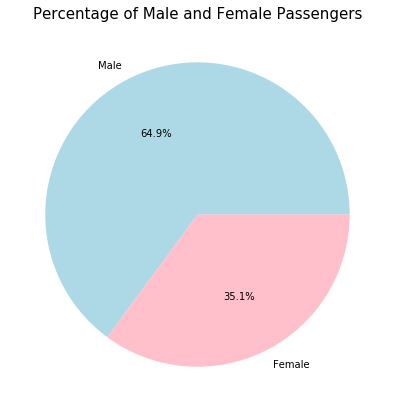

In [52]:
# Percentage of Male and Female passengers
labels = ['Male', 'Female']
colors = ['lightblue','pink']
explode = [0,0]
sizes = titanic.Sex.value_counts().values

# Visual
plt.figure(figsize = (7,7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%');
plt.title('Percentage of Male and Female Passengers',color = 'black',fontsize = 15);

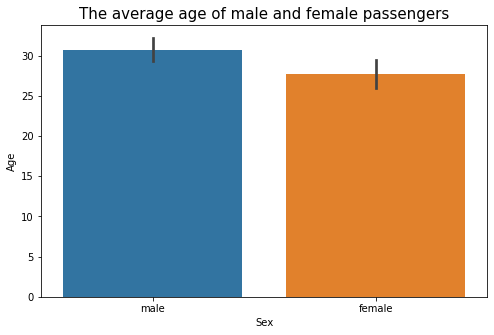

In [53]:
# Show average age of passengers based on gender
plt.figure(figsize=(8,5))
sns.barplot(x='Sex', y='Age', data=titanic);
plt.title("The average age of male and female passengers", color = 'black',fontsize = 15);

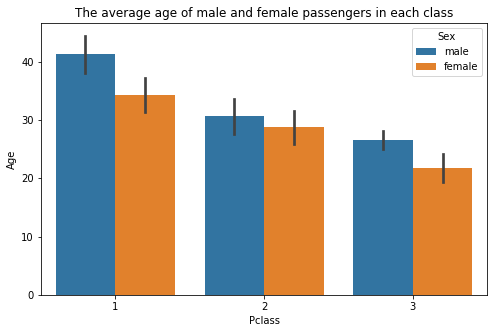

In [54]:
# Show average age of female & male passengers in each class
plt.figure(figsize=(8,5))
sns.barplot(x='Pclass', y='Age', hue='Sex', data=titanic);
plt.title("The average age of male and female passengers in each class", color = 'black',fontsize = 12);

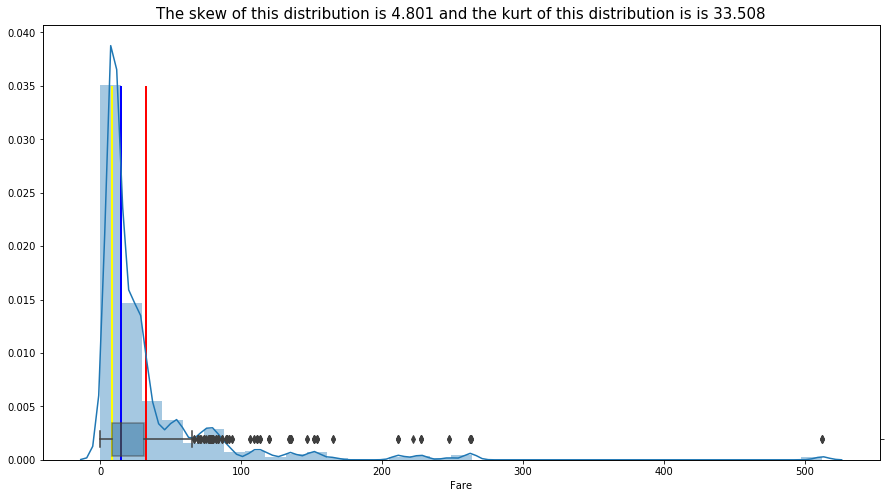

In [57]:
# Create a histogram of the fare variable
plt.figure(figsize=(15,8))
ax = sns.distplot(titanic['Fare'], bins=35);
plt.title("The skew of this distribution is {0:0.3f}".format(titanic['Fare'].skew())+"\
 and the kurt of this distribution is is {0:0.3f}".format(titanic['Fare'].kurt()), color = 'black',fontsize = 15);
ax.set(xlabel='Fare');
# Draw a red vertical line at the mean.
plt.vlines(x=titanic['Fare'].mean(), ymin=0, ymax=0.035, lw=2, colors='red');
# Draw a blue vertical line at the median.
plt.vlines(x=titanic['Fare'].median(), ymin=0, ymax=0.035, lw=2, colors='blue');
# Draw a yellow vertical line at the mode.
plt.vlines(x=titanic['Fare'].mode(), ymin=0, ymax=0.035, lw=2, colors='yellow');
ax2 = ax.twinx()
# Add a slightly transparent boxplot
sns.boxplot(x=titanic['Fare'], ax=ax2, boxprops=dict(alpha=0.5))
ax2.set(ylim=(-0.5,10));

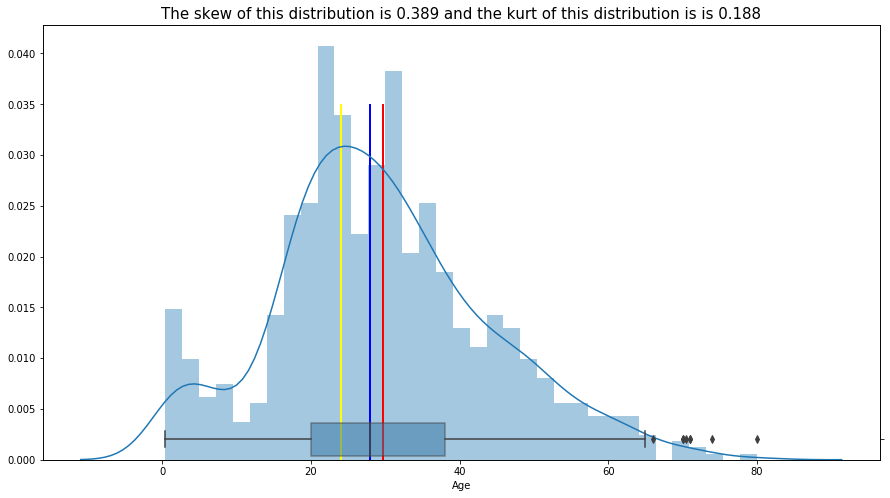

In [58]:
# Create a histogram of the age variable
plt.figure(figsize=(15,8))
ax = sns.distplot(titanic['Age'], bins=35);
plt.title("The skew of this distribution is {0:0.3f}".format(titanic['Age'].skew())+"\
 and the kurt of this distribution is is {0:0.3f}".format(titanic['Age'].kurt()), color = 'black',fontsize = 15);
ax.set(xlabel='Age');
# Draw a red vertical line at the mean.
plt.vlines(x=titanic['Age'].mean(), ymin=0, ymax=0.035, lw=2, colors='red');
# Draw a blue vertical line at the median.
plt.vlines(x=titanic['Age'].median(), ymin=0, ymax=0.035, lw=2, colors='blue');
# Draw a yellow vertical line at the mode.
plt.vlines(x=titanic['Age'].mode(), ymin=0, ymax=0.035, lw=2, colors='yellow');
ax2 = ax.twinx()
# Add a slightly transparent boxplot
sns.boxplot(x=titanic['Age'], ax=ax2, boxprops=dict(alpha=0.5))
ax2.set(ylim=(-0.5,10));

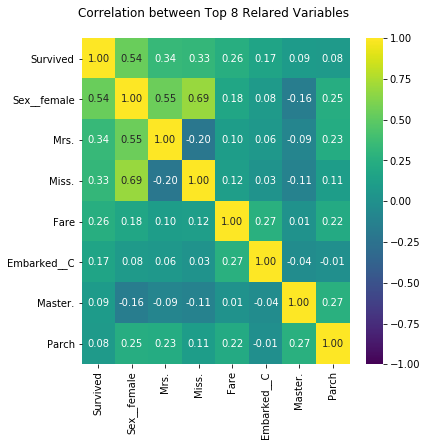

In [62]:
# The correlation heatmap shows 8 largest variables
plt.subplots(figsize=(6,6))
plt.title("Correlation between Top 8 Relared Variables \n", color = 'black',fontsize = 12)
cols = titanic.corr().nlargest(8, 'Survived')['Survived'].index
corr_mat = np.corrcoef(titanic[cols].values.T)
sns.heatmap(corr_mat, vmin=-1, vmax=+1, annot=True, fmt='.2f'
            , xticklabels=cols.values, yticklabels=cols.values, cmap='viridis');

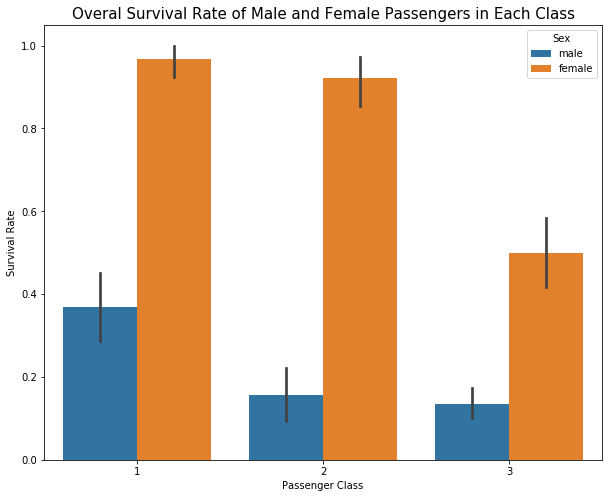

In [63]:
# Overal Survival Rate of Male and Female Passengers in Each Class
plt.figure(figsize=(10,8))
ax = sns.barplot(x = "Pclass", y = "Survived", hue = "Sex", data = titanic);
plt.title("Overal Survival Rate of Male and Female Passengers in Each Class", color = 'black',fontsize = 15);
ax.set(xlabel='Passenger Class', ylabel='Survival Rate');
plt.show()

- Project 1: Exploratory Data Analysis with Titanic 
- Solved and Submitted by Arwa Alamoudi - 1/4/2020